# (Flights Dataset Exploration Presentation)
## by (Abdelrahman Nasr)

## Investigation Overview

> Describe the carrier feature effect on the numbers of delayed, canceled and diverted flights.

## Dataset Overview

> There are 159335 flights information in the dataset with each entry lists the number of flights, the number of flights delayed, the number of flights canceled and diverted, the minutes of delay due to (carrier-weather-national air system-security) and finally the sum of total delay minutes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('flights dataset.csv')
df = df.iloc[:, :-1]
df.dropna()
df.columns = df.columns.str.lstrip()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> First visual shows The percentage of the number of delayed and diverted flights to the total number of arrived flights for each carrier and it's clear that the JetBlue Airways carrier (B6) has the highest proportion of delayed flights while Hawaiian Airlines Inc. carrier has the lowest proportion.

In [3]:
# make a color palette for the carriers
carriers = list(df.carrier.unique())
carriers.sort()
color = sb.color_palette('tab20c')
color.extend([to_rgb('#b33939'), to_rgb('#ff5252')])
colours = {carriers[i]: color[i] for i in range(len(carriers))}

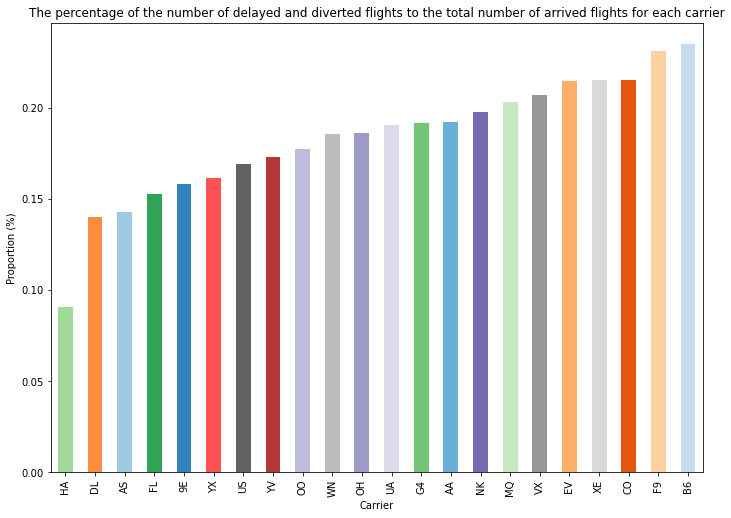

In [4]:
# The percentage of the number of delayed and diverted flights to the total number of arrived flights for each carrier visual
plt.figure(figsize=[11.69, 8.27])
s1 = ((df.groupby('carrier').arr_del15.sum() + df.groupby('carrier').arr_diverted.sum()) / df.groupby('carrier').arr_flights.sum()).sort_values()
s1.plot(kind='bar', color=s1.index.map(colours))
plt.title('The percentage of the number of delayed and diverted flights to the total number of arrived flights for each carrier')
plt.xlabel('Carrier')
plt.ylabel('Proportion (%)');

## (Visualization 2)

> Second visual shows the proportion between the number of canceled flights to the total number of arrived flights for each carrier and it's clear that the Allegiant Air carrier (G4) has the hightest proportions in canceled flights while Hawaiian Airlines Inc. carrier has the lowest proportion.

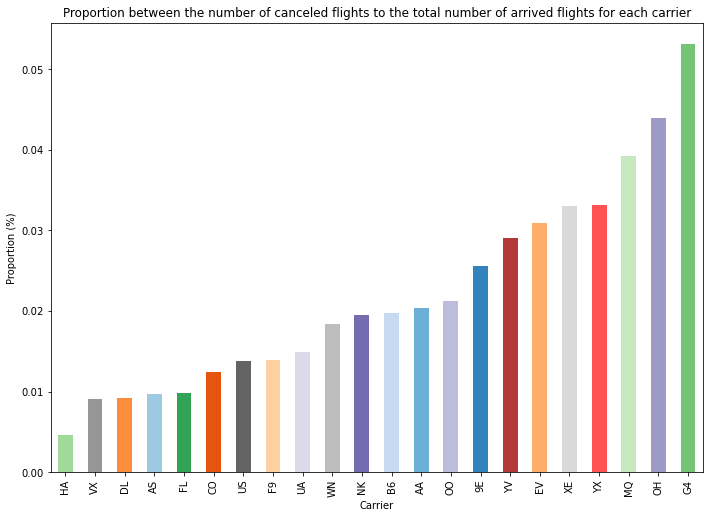

In [5]:
# Proportion between the number of canceled flights to the total number of arrived flights for each carrier visual
plt.figure(figsize=[11.69, 8.27])
s2 = (df.groupby('carrier').arr_cancelled.sum() / df.groupby('carrier').arr_flights.sum()).sort_values()
s2.plot(kind='bar', color=s2.index.map(colours))
plt.title('Proportion between the number of canceled flights to the total number of arrived flights for each carrier')
plt.xlabel('Carrier')
plt.ylabel('Proportion (%)');

## (Visualization 3)

> Thired visual shows the Proportion between the total time of delay to the counts of delayed flights for each reason to calculate the mean delay time for each reason and as you can see the weather has the highest mean while security has the lowest.

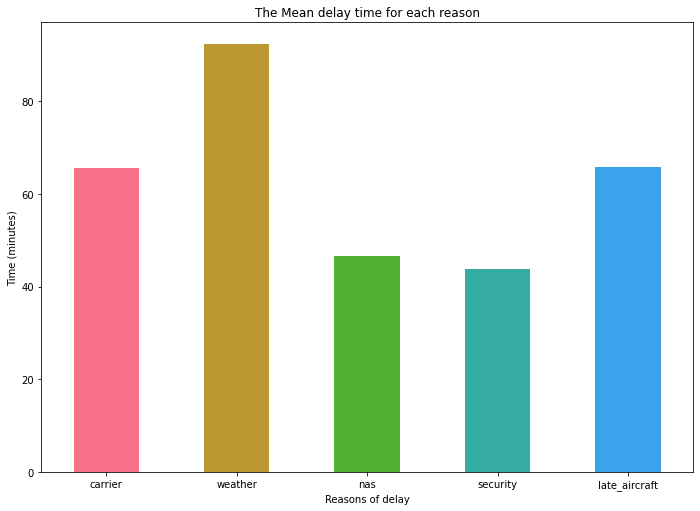

In [6]:
delay_counts = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct'] 
delay_time = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Proportion between the total time of delay to the counts of delayed flights for each reason
reasons_names = ['carrier', 'weather', 'nas', 'security', 'late_aircraft']
# change the two series indexes name to match
a = df[delay_time].sum()
reasons = {a.index[i]: reasons_names[i] for i in range(len(reasons_names))}
a.rename(index=reasons, inplace=True)

b = df[delay_counts].sum()
reasons = {b.index[i]: reasons_names[i] for i in range(len(reasons_names))}
b.rename(index=reasons, inplace=True)
# plot the visual
plt.figure(figsize=[11.69, 8.27])
(np.divide(a, b)).plot(kind='bar', color=sb.color_palette("husl"), rot=0)
plt.title('The Mean delay time for each reason')
plt.xlabel('Reasons of delay')
plt.ylabel('Time (minutes)');

## (Visualization 4)

> Fourth visual shows Proportion between the total time of delay to the counts of delayed flights for each reason grouped by each carrier to calculate the mean delay time for each reason for each carrier.

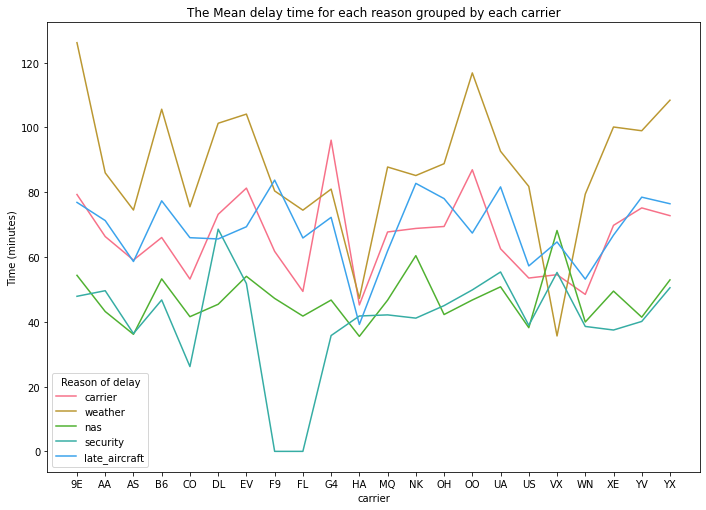

In [7]:
# Proportion between the total time of delay to the counts of delayed flights for each reason grouped by each carrier
reasons_names = ['carrier', 'weather', 'nas', 'security', 'late_aircraft']
# change the two dataframes columns name to match
a = df.groupby('carrier')[delay_time].sum()
reasons = {a.columns[i]: reasons_names[i] for i in range(len(reasons_names))}
a.rename(columns=reasons, inplace=True)

b = df.groupby('carrier')[delay_counts].sum()
reasons = {b.columns[i]: reasons_names[i] for i in range(len(reasons_names))}
b.rename(columns=reasons, inplace=True)
# plot the visual
ax = (a.div(b).fillna(0)).plot(figsize=[11.69, 8.27], color=sb.color_palette("husl"))
ax.set_xticks(np.arange(0, 22, 1))
ax.set_xticklabels(a.index)
plt.legend(title='Reason of delay')
plt.ylabel('Time (minutes)')
plt.title('The Mean delay time for each reason grouped by each carrier');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!